In [1]:
import pandas as pd
import seaborn as sns
#导入并显示西瓜数据集
#watermelon = sns.load_dataset("xigua_data3.0")
watermelon = pd.read_csv("./data/xigua_data3.0.csv")
watermelon = watermelon.iloc[:, 1:]
display(watermelon)

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


[Text(0.5, 0, 'Sugar content'), Text(0, 0.5, 'count')]

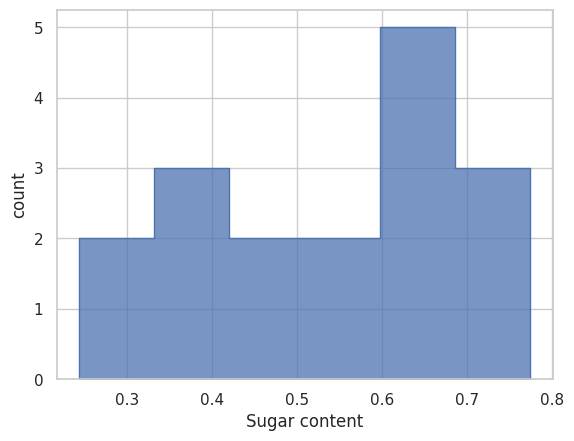

In [2]:
watermelon = pd.read_csv("./data/xigua_data3.0-en.csv")
#设置Seaborn参数
#rc = {'font.sans-serif' : 'SimHei', 'axes.unicode_minus': False}
#sns.set(context = 'notebook', style = 'whitegrid', rc=rc)
sns.set(context = 'notebook', style = 'whitegrid')

#TODO:绘制西瓜数据集的“阶梯式”密度分布图
sns.histplot(watermelon['density'], kde=False, bins=6, stat="count", element="step").set(xlabel='Sugar content', ylabel='count')

[Text(0.5, 0, 'Sugar content'), Text(0, 0.5, 'density')]

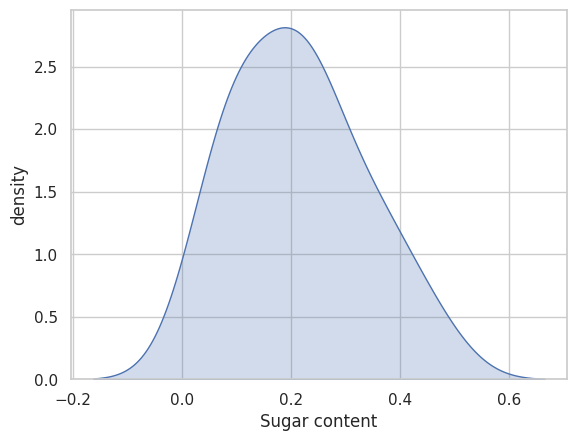

In [3]:
#TODO:绘制西瓜数据集的“核密度估计KDE”含糖率分布
#sns.kdeplot(watermelon['含糖率'], shade=True)
sns.kdeplot(watermelon['sugar content'], fill=True).set(xlabel='Sugar content', ylabel='density')

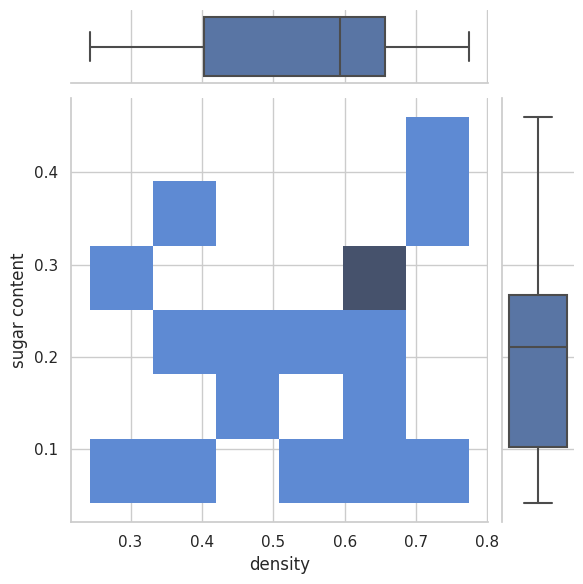

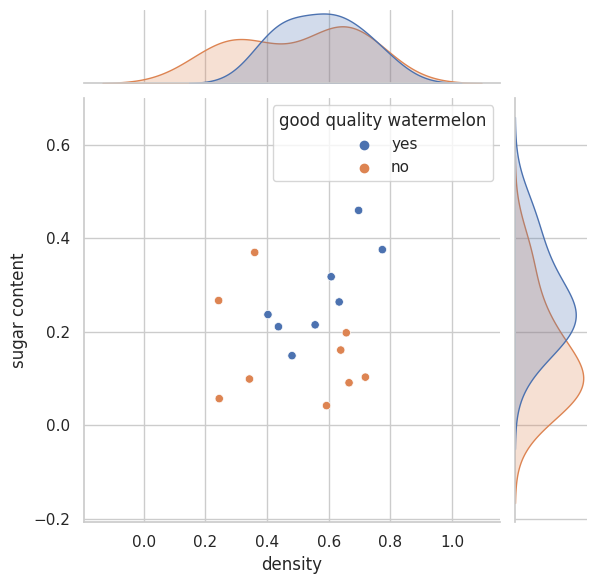

In [4]:
#TODO:使用联合分布,边缘分布设置为盒图,绘制西瓜数据集的密度与含糖率二元分布
# g = sns.jointplot(data=watermelon, x="density", y="sugar content", kind="scatter", marginal_kws=dict(kind="box"))
# g.set_axis_labels('density', 'Sugar content')
#sns.jointplot(data=watermelon, x='density', y='sugar content', kind='kde', marginal_box=True)
#sns.jointplot(data=watermelon, x='density', y='sugar content', kind='hist',marginal_kws={'marginal': 'box', 'color': 'b'}, color='b')
import matplotlib.pyplot as plt
g = sns.JointGrid(data=watermelon, x='density', y='sugar content')
g.plot_joint(sns.histplot, color='b')
g.plot_marginals(sns.boxplot)

#密度与含糖率关系分析
sns.jointplot(data=watermelon,x='density', y='sugar content', hue='good quality watermelon')

<Axes: xlabel='texture', ylabel='sugar content'>

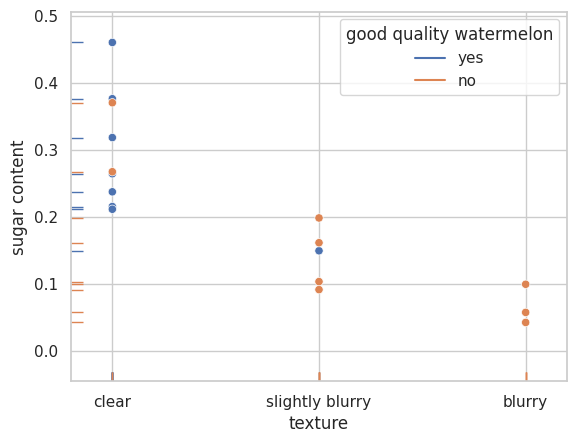

In [5]:
sns.scatterplot(data=watermelon, x='texture',y="sugar content", hue='good quality watermelon')
sns.rugplot(data=watermelon, x='texture',y="sugar content", hue='good quality watermelon')

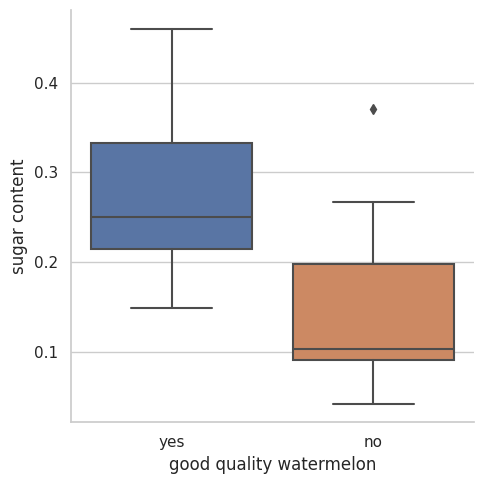

In [6]:
#好瓜、坏瓜含糖率分布
sns.catplot(data=watermelon, x="good quality watermelon",y="sugar content",kind="box")

<Axes: xlabel='touch', ylabel='density'>

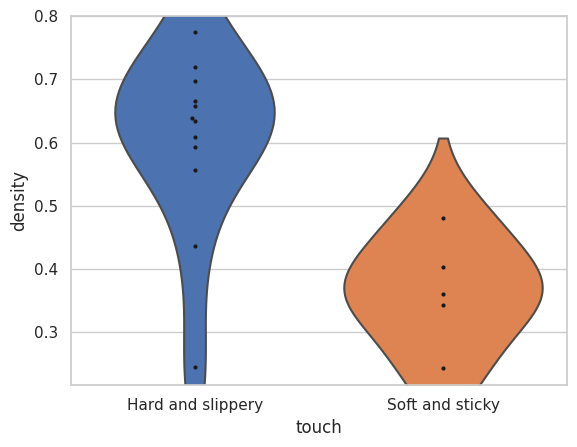

In [23]:
#TODO:不同触感的密度分布_小提琴图
# 首先绘制小提琴图
sns.violinplot(x="touch", y="density", data=watermelon, inner=None)
# 在同一个图上添加swarmplot
sns.swarmplot(x="touch", y="density", color="k", size=3, data=watermelon)
#sns.swarmplot(x="touch", y="density", color="k", size=3, data=watermelon, ax=g.ax)
#sns.swarmplot(x="触感",y="密度",color="k", size=3, data = watermelon, ax= g.ax)